# Mock Census Data PROJECT
---

## Background Information:
Every ten years, the United Kingdom undertakes a census of the population, with the most recent one having 
been conducted in 2021. The purpose of such a census is to compare different people across the nation and to 
provide the government with accurate statistics of the population to enable better planning, to develop policies, 
and to allocate certain funding. 

This project provides a comprehensive and detailed analysis of the population data of a moderately sized town, 
situated in between two major cities. The aim is to make insightful recommendations on what the local 
government should build on an unoccupied piece of land.
To ensure accurate recommendations, errors in the data such as missing (null) values, spurious entries and
misleading information were treated or dropped where appropriate.

Furthermore, a well detailed visualization and analysis will be used to arrive at the recommendations in the latter 
part of the report.


## Data Dictionary: 
The mock census you will be given contains randomly generate data using the Faker package in Python. It has 
been generated in a similar manner to (and designed to directly emulate the format of) the 1881 census of the 
UK wherein only a few questions were asked of the population. The fields recorded are as follows: 
- Street Number (this is set to “1” if it is a unique dwelling); 
- Street Name; 
- First Name of occupant; 
- Surname of occupant; 
- Age of occupant; 
- Relationship to the “Head” of the household (anyone aged over 18 can be a “Head” – they are simply the person who had the responsibility to fill in the census details); 
- Marital status (one of: Single, Married, Divorced, Widowed, or “NA” in the case of minors); 
- Gender (one of: Male, Female; note that other responses were not implemented in 1881); 
- Occupation (this field was implemented in a modern style, rather than typical 1881 occupations); 
- Infirmity (we have implemented a limited set of infirmities following the style of 1881); 
- Religion (we have implemented a set of real-world religions).

## Project Task:
- Clean and preprocess the data and make necessary visualizations.
- To advise on what the government should build on an unused plot of land
- To provide insights based on the data into what services should be invested in.

Importing Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading in the File:

In [2]:
#Reading the CSV file:
census_df = pd.read_csv(r"C:\Users\ohiom\Documents\My work space\Hull\Module 2\Fundamentals of DS\project\5 mins presentation\census11.csv")
census_df.sample(5)

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6560,26,ExcaliburBellsby Drive,June,Martin,17,Daughter,NaN,Female,Student,None,NaN
823,55,Cambridge Street,Jill,Cole,1,Daughter,NaN,Female,Child,None,NaN
7196,25,Murray Drive,Timothy,Martin,9,Son,NaN,Male,Student,None,NaN
764,40,Cambridge Street,Paula,Booth,0,Daughter,NaN,Female,Child,None,NaN
1282,43,Wharf Track,Scott,Brown,27,Head,Married,Male,Retail buyer,None,None


### Inspecting the Data Properties:

In [3]:
#Checking the properties of the data:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8377 entries, 0 to 8376
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   8377 non-null   int64 
 1   Street                         8377 non-null   object
 2   First Name                     8377 non-null   object
 3   Surname                        8377 non-null   object
 4   Age                            8377 non-null   object
 5   Relationship to Head of House  8377 non-null   object
 6   Marital Status                 6402 non-null   object
 7   Gender                         8377 non-null   object
 8   Occupation                     8377 non-null   object
 9   Infirmity                      8377 non-null   object
 10  Religion                       6365 non-null   object
dtypes: int64(1), object(10)
memory usage: 720.0+ KB


- The data comprises of 8377 entries and 11 features
- All features contain 8377 entries except Marital status and religion.
- There are 10 object data type and 1 integer data type across the 11 features.
- Age is recorded as an object. This needs to be an int or a float.
---

In [4]:
#Checking total number of missing (NaN) values across all features:
census_df.isna().sum()

House Number                        0
Street                              0
First Name                          0
Surname                             0
Age                                 0
Relationship to Head of House       0
Marital Status                   1975
Gender                              0
Occupation                          0
Infirmity                           0
Religion                         2012
dtype: int64

- Marital Status and Religion has 1975 and 2012 NaN values respectively.
------

## Data Cleaning Across Features:

### 1. Age:

#### Identifying Errors:

In [5]:
#Checking the unique entries for Age across the data:
census_df['Age'].unique()

array(['41', '11', '7', '40', '35', '19', '17', '60', '62', '30', '42',
       '46', '4', '78', '81', '43', '44', '24', '57', '53', '32', '12',
       '9', '85', '58', '59', '26', '90', '97', '63', '18', '15', '10',
       '47', '16', '13', '36', '6', '2', '1', '25', '56', '38', '21',
       '31', '74', '67', '65', '71', '79', '45', '61', '72', '54', '33',
       '34', '23', '28', '29', '91', '64', '80', '76', '49', '73', '50',
       '84', '75', '48', '14', '51', '22', '66', '20', '77', '0', '27',
       '86', '68', '5', '83', '55', '69', '70', '39', '82', '88', '37',
       '52', '8', '3', '87', '105', '95', '96', '89', '92', '93', '99',
       '101', '98', '116', '112', '94', '59.782817341882584', '9.0',
       '102', '103', ' ', '100', '104', '106', '59.841399743989754',
       '63.841399743989754', '107', '75.27548655560247',
       '21.999999999999993', '17.999999999999993'], dtype=object)

- Age is stored as an object and not a number and some values are floats.
- Some floats have some highly unlikely digits after the decimals. These numbers will be subsequently removed because most ages in the data have no decimals.
- Age also contains one empty string as seen above.

In [6]:
census_df[census_df.Age==' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4000,6,Pendragon Lane,Howard,Baker,,Son,Single,Male,University Student,None,Methodist


- Only one entry located at row 4000 has an empty string (" ") value for Age.

#### Fixing Errors in Age feature:

Treating the floats:

In [7]:
#Obtaining a list containing the new age values without decimals:
age = [val.split('.')[0] if '.' in val else val for val in census_df.Age]

#Converting the age list to array and assigning it to the Age feature in the data.
census_df.Age = np.array(age)

In [8]:
#Verifying new age values without decimals:
census_df.Age.unique()

array(['41', '11', '7', '40', '35', '19', '17', '60', '62', '30', '42',
       '46', '4', '78', '81', '43', '44', '24', '57', '53', '32', '12',
       '9', '85', '58', '59', '26', '90', '97', '63', '18', '15', '10',
       '47', '16', '13', '36', '6', '2', '1', '25', '56', '38', '21',
       '31', '74', '67', '65', '71', '79', '45', '61', '72', '54', '33',
       '34', '23', '28', '29', '91', '64', '80', '76', '49', '73', '50',
       '84', '75', '48', '14', '51', '22', '66', '20', '77', '0', '27',
       '86', '68', '5', '83', '55', '69', '70', '39', '82', '88', '37',
       '52', '8', '3', '87', '105', '95', '96', '89', '92', '93', '99',
       '101', '98', '116', '112', '94', '102', '103', ' ', '100', '104',
       '106', '107'], dtype=object)

#### Treating the empty string in Age:

In [9]:
census_df[census_df.Age==' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4000,6,Pendragon Lane,Howard,Baker,,Son,Single,Male,University Student,None,Methodist


- As seen, the person with the empty age value, Howard Baker, is a University Student.

In [10]:
#University age range from the data:
University_ages = census_df.loc[census_df['Occupation']=='University Student']['Age'].unique()
University_ages

array(['19', '21', '22', '20', '18', ' '], dtype=object)

- As seen, the ages of University student are 19, 21, 22, 20 and 18. It is highly possible that Howard's age will fall within those age bracket. As a result, the mean age will be computed and used to replace the empty string:

In [11]:
#Finding the mean age value for the unique ages excluding the empty string:
mean_age = University_ages[0:5].astype(int).mean()
mean_age

20.0

In [12]:
#Replacing the ' ' with the mean age (ie 20) and converting all entries to integer using .astype() method:
census_df.Age = census_df.Age.replace(' ', mean_age).astype(int)

In [13]:
#Verifying that Age for Howard has been filled with 20:
census_df.loc[4000, :]

House Number                                      6
Street                               Pendragon Lane
First Name                                   Howard
Surname                                       Baker
Age                                              20
Relationship to Head of House                   Son
Marital Status                               Single
Gender                                         Male
Occupation                       University Student
Infirmity                                      None
Religion                                  Methodist
Name: 4000, dtype: object

In [14]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8377 entries, 0 to 8376
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   8377 non-null   int64 
 1   Street                         8377 non-null   object
 2   First Name                     8377 non-null   object
 3   Surname                        8377 non-null   object
 4   Age                            8377 non-null   int32 
 5   Relationship to Head of House  8377 non-null   object
 6   Marital Status                 6402 non-null   object
 7   Gender                         8377 non-null   object
 8   Occupation                     8377 non-null   object
 9   Infirmity                      8377 non-null   object
 10  Religion                       6365 non-null   object
dtypes: int32(1), int64(1), object(9)
memory usage: 687.3+ KB


- The Age feature now shows a dtype of int32 meaning it has been casted to integers.

### House Number:

In [15]:
census_df[census_df['House Number']==' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


- There are no error entry in the House Number feature.

### Street:

In [16]:
census_df[census_df['Street']==' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


- No errors as well.

### First Name:

In [17]:
#Returning entries where First Name is "  ":
census_df[census_df['First Name']==' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1497,4,Power Keys,,Frost,88,Head,Widowed,Male,Retired Civil Service fast streamer,None,Methodist


- It is almost imposible to predict the first name of a person. However, from the details of the data, which is to help the government plan beter, the first name of a person has little or no effect on the both the goal of the data collection and the census outcome. Hence, I will assign the surname (Frost) as the first name:

- Row number for this entry is 1497

In [18]:
#Replacing First name with 'Frost':
census_df.loc[1497, 'First Name'] = 'No Entry'

In [19]:
#Verifying First name change:
census_df.loc[(census_df['Surname']=='Frost') & (census_df['Street']=='Power Keys')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1497,4,Power Keys,No Entry,Frost,88,Head,Widowed,Male,Retired Civil Service fast streamer,None,Methodist


### Surname:

In [20]:
#Returning entries where Surname is "  "
census_df[census_df['Surname']==' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
60,8,Telegraphnet Street,Linda,,41,Daughter,Single,Female,Commercial art gallery manager,None,Christian
4236,48,Chan Estate,Denise,,9,Adopted Daughter,NaN,Female,Student,None,NaN


- Two entries at row 60 and 4236 has empty values as Surname.

In [21]:
#checking details of everyone living at same address as row 60:
census_df.loc[(census_df['House Number']==8) & (census_df['Street']=='Telegraphnet Street')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
57,8,Telegraphnet Street,Elaine,Patel,78,Head,Divorced,Female,Retired Clinical biochemist,None,Christian
58,8,Telegraphnet Street,Kate,Patel,44,Daughter,Single,Female,Translator,None,Christian
59,8,Telegraphnet Street,Damien,Patel,42,Son,Single,Male,Tourist information centre manager,None,Christian
60,8,Telegraphnet Street,Linda,,41,Daughter,Single,Female,Commercial art gallery manager,None,Christian
61,8,Telegraphnet Street,Patricia,Patel,38,Daughter,Divorced,Female,Psychiatrist,None,Christian


In [22]:
#checking details of everyone living at same address as row 4236:
census_df.loc[(census_df['House Number']==48) & (census_df['Street']=='Chan Estate')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4232,48,Chan Estate,Francesca,Lloyd,37,Head,Married,Female,Drilling engineer,None,Catholic
4233,48,Chan Estate,Shane,Lloyd,41,Husband,Married,Male,Banker,None,Catholic
4234,48,Chan Estate,Alexandra,Lloyd,13,Daughter,NaN,Female,Student,None,NaN
4235,48,Chan Estate,Arthur,Lloyd,12,Son,NaN,Male,Student,None,NaN
4236,48,Chan Estate,Denise,,9,Adopted Daughter,NaN,Female,Student,None,NaN


- It is clear that the surnames for both entries are Patel and Lloyd respectively.

In [23]:
#Replacing the Surnames with 'Patel' and 'Lloyd' respectively:
census_df.loc[60,'Surname'] = census_df.loc[60,'Surname'].replace(' ', 'Patel')

census_df.loc[4236,'Surname'] = census_df.loc[4236,'Surname'].replace(' ', 'Lloyd')

In [24]:
#Verifying Surname change:
census_df.loc[(census_df['House Number']==8) & (census_df['Street']=='Telegraphnet Street')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
57,8,Telegraphnet Street,Elaine,Patel,78,Head,Divorced,Female,Retired Clinical biochemist,None,Christian
58,8,Telegraphnet Street,Kate,Patel,44,Daughter,Single,Female,Translator,None,Christian
59,8,Telegraphnet Street,Damien,Patel,42,Son,Single,Male,Tourist information centre manager,None,Christian
60,8,Telegraphnet Street,Linda,Patel,41,Daughter,Single,Female,Commercial art gallery manager,None,Christian
61,8,Telegraphnet Street,Patricia,Patel,38,Daughter,Divorced,Female,Psychiatrist,None,Christian


In [25]:
#Verifying Surname change:
census_df.loc[(census_df['House Number']==48) & (census_df['Street']=='Chan Estate')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4232,48,Chan Estate,Francesca,Lloyd,37,Head,Married,Female,Drilling engineer,None,Catholic
4233,48,Chan Estate,Shane,Lloyd,41,Husband,Married,Male,Banker,None,Catholic
4234,48,Chan Estate,Alexandra,Lloyd,13,Daughter,NaN,Female,Student,None,NaN
4235,48,Chan Estate,Arthur,Lloyd,12,Son,NaN,Male,Student,None,NaN
4236,48,Chan Estate,Denise,Lloyd,9,Adopted Daughter,NaN,Female,Student,None,NaN


### Relationship to Head of House:

In [26]:
#Checking unique entries:
census_df['Relationship to Head of House'].unique()

array(['Head', 'Daughter', 'Son', 'Wife', 'Husband', 'None', 'Partner',
       'Lodger', 'Grandson', 'Granddaughter', 'Sibling', 'Visitor',
       'Cousin', 'Adopted Daughter', 'Nephew', 'Neice', 'Adopted Son',
       'Step-Son', 'Step-Daughter', 'Adopted Granddaughter'], dtype=object)

- Niece was wrongly spelt as Neice.

In [27]:
#Correcting the speeling of 'Neice':
census_df['Relationship to Head of House'] = census_df['Relationship to Head of House'].replace('Neice','Niece')

In [28]:
#Verifying change:
census_df['Relationship to Head of House'].unique()

array(['Head', 'Daughter', 'Son', 'Wife', 'Husband', 'None', 'Partner',
       'Lodger', 'Grandson', 'Granddaughter', 'Sibling', 'Visitor',
       'Cousin', 'Adopted Daughter', 'Nephew', 'Niece', 'Adopted Son',
       'Step-Son', 'Step-Daughter', 'Adopted Granddaughter'], dtype=object)

### Marital Status Analysis:

In [29]:
#Checking Unique values:
census_df['Marital Status'].unique()

array(['Divorced', nan, 'Married', 'Single', 'Widowed', ' '], dtype=object)

- Contains null values and empty string (" ").

Examining 'Married Minors' (under 18 years):

In [30]:
census_df[(census_df['Age']<18) & (census_df['Marital Status']=='Married')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4171,31,Chan Estate,Abigail,Begum,17,Head,Married,Female,Student,None,NaN
4919,11,Arrows Mission,Valerie,Smith,15,Head,Married,Female,Student,None,NaN


In [31]:
census_df[(census_df['House Number']==31) & (census_df['Street']=='Chan Estate')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4171,31,Chan Estate,Abigail,Begum,17,Head,Married,Female,Student,None,NaN
4172,31,Chan Estate,Daniel,Begum,19,Husband,Married,Male,University Student,None,None
4173,31,Chan Estate,Elliott,Begum,0,Son,NaN,Male,Child,None,NaN
4174,31,Chan Estate,Douglas,Mills,50,Cousin,Single,Male,Financial adviser,None,Catholic


In [32]:
census_df[(census_df['House Number']==11) & (census_df['Street']=='Arrows Mission')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4919,11,Arrows Mission,Valerie,Smith,15,Head,Married,Female,Student,None,NaN
4920,11,Arrows Mission,Justin,Smith,19,Husband,Married,Male,University Student,None,NaN
4921,11,Arrows Mission,Jade,Jackson,28,Lodger,Single,Female,Community development worker,None,None


- Since its obvious that they can't be married under british law (Marriage and Civil Partnership (Minimum Age) Act 2022, c.28) and their relationship can't be determined, they entries will be dropped and treated as misleading entries:

In [33]:
census_df.drop([4171,4172,4919,4920],inplace=True)

In [34]:
census_df = census_df.reset_index(drop=True)
census_df

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Regentchain Avenue,Ashleigh,Dale,41,Head,Divorced,Female,Field trials officer,None,Catholic
1,1,Regentchain Avenue,Deborah,Dale,11,Daughter,NaN,Female,Student,None,NaN
2,1,Regentchain Avenue,Gary,Dale,7,Son,NaN,Male,Student,None,NaN
3,2,Regentchain Avenue,Edward,Grant,40,Head,Married,Male,Environmental education officer,None,Methodist
4,2,Regentchain Avenue,Elizabeth,Grant,35,Wife,Married,Female,Public librarian,None,Catholic
...,...,...,...,...,...,...,...,...,...,...,...
8368,1,Howard House,Dennis,Bryant,1,Son,NaN,Male,Child,None,NaN
8369,1,Howard House,Beverley,Cox,44,Lodger,Single,Female,Building services engineer,None,None
8370,1,Howard House,Lee,Harrison,32,Lodger,Single,Male,Diplomatic Services operational officer,None,None
8371,1,Howard House,Hollie,Carroll,52,Lodger,Single,Female,Further education lecturer,None,Christian


Treating Empty String ("  ") in Marital Status:

In [35]:
census_df[census_df['Marital Status']==' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4228,47,Chan Estate,Norman,Ward,25,Son,,Male,Administrator,None,None


- Row 4228 contains the empty string.
- Entry is a Son to the Head of house.

Next, I will analyse the marital Status of all entries holding a Son relationship to the head of house. The Marital Status with the highest entry will be assogned to the empty string:

In [36]:
#Married Status for Sons for Age <= 25:
len(census_df.loc[(census_df['Marital Status']=='Married') & (census_df['Age']<=25) &\
                  (census_df['Relationship to Head of House']=='Son')]['Marital Status'])

0

In [37]:
#Single Status for Sons for Age <= 25:
len(census_df[(census_df['Marital Status']=='Single') & (census_df['Age']<=25) &\
              (census_df['Relationship to Head of House']=='Son')]['Marital Status'])

173

In [38]:
#Divorced Status for Sons for Age <= 25:
len(census_df[(census_df['Marital Status']=='Divorced') & (census_df['Age']<=25) &\
              (census_df['Relationship to Head of House']=='Son')]['Marital Status'])

44

In [39]:
#Widowed Status for Sons for Age <= 25:
len(census_df[(census_df['Marital Status']=='Widowed') & (census_df['Age']<=25) &\
              (census_df['Relationship to Head of House']=='Son')]['Marital Status'])

7

From the analysis for Ages 25 years and below:
- 173 of the entries are SINGLE,
- 44 are DIVORCED,
- 7 are Widowed,
- None is married.

Therefore, it can be inferred that there's a high chance that an entry who is a son to the head of house is SINGLE. Hence, I will fill the empty value with 'Single'.

In [40]:
#Filling Empty values with 'Single':
census_df.loc[4228,'Marital Status'] = census_df.loc[4230,'Marital Status'].replace(' ', 'Single')

In [41]:
census_df.groupby(['Marital Status'])['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Marital Status,,,,,,,,
Divorced,791.0,42.415929,17.389367,16.0,29.0,39.0,52.0,100.0
Married,2221.0,50.488969,16.751617,18.0,38.0,48.0,62.0,116.0
Single,2999.0,38.247749,14.176446,17.0,26.0,37.0,49.0,96.0
Widowed,387.0,67.041344,18.265127,18.0,65.5,71.0,78.0,105.0


- Age 16 was divorced. It will be treated during the treatment for null values below.

Treating the null in Marital Status:

In [42]:
#All entries with null values as Marital Status and are minors (less than 18 years):
census_df.loc[(census_df['Age']<=17) & (census_df['Marital Status'].isna())]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1,1,Regentchain Avenue,Deborah,Dale,11,Daughter,NaN,Female,Student,None,NaN
2,1,Regentchain Avenue,Gary,Dale,7,Son,NaN,Male,Student,None,NaN
6,2,Regentchain Avenue,Mandy,Grant,17,Daughter,NaN,Female,Student,None,NaN
7,2,Regentchain Avenue,Amanda,Grant,11,Daughter,NaN,Female,Student,None,NaN
14,4,Regentchain Avenue,Sandra,Price,4,Daughter,NaN,Female,Child,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8348,1,Oyster Manorhouse,Howard,Goodwin,17,Son,NaN,Male,Student,None,NaN
8365,1,Howard House,Tom,Bryant,13,Son,NaN,Male,Student,None,NaN
8366,1,Howard House,Jean,Bryant,8,Daughter,NaN,Female,Student,None,NaN
8367,1,Howard House,Abbie,Bryant,4,Daughter,NaN,Female,Child,None,NaN


- Marital Status contains 1975 total null values. From the above, entries with age less than 18 years represents these values.
- According to the data information, any age less than 18 are considered minors and can be tagged N/A. Hence, their Marital Status will be filled with 'N/A':

In [43]:
#Filling the Marital Status for minors(<18) with 'N/A':
census_df.loc[census_df['Age']<18,'Marital Status'] = 'N/A'

In [44]:
#Sanity check for null values:
census_df[census_df['Age']<18].sample(5)

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5845,2,Dixon Islands,Deborah,Brown-Webb,15,Daughter,N/A,Female,Student,None,NaN
7626,8,Aethelred Heights,Katherine,Scott-Jackson,14,Daughter,N/A,Female,Student,None,NaN
1748,25,Earlsplit Drive,Ian,Carr-King,0,Son,N/A,Male,Child,None,NaN
1742,24,Earlsplit Drive,Adam,Thompson,12,Son,N/A,Male,Student,None,NaN
7119,6,Murray Drive,John,Mahmood,4,Son,N/A,Male,Child,None,NaN


In [45]:
census_df.groupby(['Marital Status'])['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Marital Status,,,,,,,,
Divorced,790.0,42.449367,17.374919,18.0,29.0,39.0,52.0,100.0
Married,2221.0,50.488969,16.751617,18.0,38.0,48.0,62.0,116.0
N/A,1977.0,8.982296,5.072769,0.0,5.0,9.0,13.0,17.0
Single,2998.0,38.254837,14.173496,18.0,26.0,37.0,49.0,96.0
Widowed,387.0,67.041344,18.265127,18.0,65.5,71.0,78.0,105.0


### Gender:

In [46]:
#checking unique values:
census_df.Gender.unique()

array(['Female', 'Male', ' '], dtype=object)

- Contains an empty string (" ").

In [47]:
#Outputing all entries with "  " as Gender:
census_df.loc[census_df['Gender']==' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1002,1,Taylor Grove,Pamela,Edwards,69,Head,Married,,"Retired Engineer, technical sales",None,Christian
6895,8,Tiger Avenue,Leanne,Gill,22,None,Single,,University Student,None,None
7344,25,Canterbury Well,Irene,Harvey,51,Head,Married,,"Librarian, public",None,Christian


- From their first names (Pamela, Leanne and Irene), we can tell they are all feminine names. Therefore, the empty gender values will be replaced the 'Female'.
- Rows for empty string Gender values are 1002, 6895 and 7344.

In [48]:
#Replacing "  " in Gender column with 'Female'.
census_df.loc[(census_df['Gender']==' '), 'Gender'] = census_df.loc[(census_df['Gender']==' '), 'Gender'].replace(' ','Female')

In [49]:
#Rechecking the rows to see change:
census_df.iloc[[1002,6895,7344], :]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1002,1,Taylor Grove,Pamela,Edwards,69,Head,Married,Female,"Retired Engineer, technical sales",None,Christian
6895,8,Tiger Avenue,Leanne,Gill,22,None,Single,Female,University Student,None,None
7344,25,Canterbury Well,Irene,Harvey,51,Head,Married,Female,"Librarian, public",None,Christian


### Occupation:

- The census data contains people who are retired in different professions as shown in the Occupation column below:

#### Retired:

In [50]:
#All entries with key word 'Retired' found in Occupation title:
census_df[(census_df['Occupation'].str.contains('Retired'))]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
15,5,Regentchain Avenue,Danielle,Dean,78,Head,Married,Female,Retired Community education officer,None,None
16,5,Regentchain Avenue,Robert,Dean,81,Husband,Married,Male,"Retired Doctor, hospital",None,None
29,8,Regentchain Avenue,Leon,Duncan,85,Head,Widowed,Male,Retired Surgeon,None,Christian
34,2,Telegraphnet Street,Leah,Taylor,90,Head,Married,Female,Retired Landscape architect,None,Catholic
35,2,Telegraphnet Street,Craig,Taylor,97,Husband,Married,Male,"Retired Engineer, civil (consulting)",None,Catholic
...,...,...,...,...,...,...,...,...,...,...,...
8227,41,Arnold Ways,Francis,Moore,79,Head,Married,Male,Retired Counsellor,None,Christian
8228,41,Arnold Ways,Jodie,Moore,80,Wife,Married,Female,Retired Actor,None,Christian
8232,45,Arnold Ways,Margaret,James,70,Head,Married,Female,Retired Control and instrumentation engineer,None,Christian
8237,47,Arnold Ways,Maurice,Hughes,80,Head,Divorced,Male,"Retired Therapist, sports",None,Christian


- 749 entries are retired.
- These entries are all retired in different profession. Therefore, all their Occupations can be replaced with 'Retired' to indicate the retired status.

In [51]:
#Replacing the Occupation entry for all entries with 'Retired' key word in them with 'Retired'.

census_df.loc[(census_df['Occupation'].str.contains('Retired')), 'Occupation'] = 'Retired'


In [52]:
#Sanity check to verify change:
census_df.loc[(census_df['Occupation'].str.contains('Retired'))].head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
15,5,Regentchain Avenue,Danielle,Dean,78,Head,Married,Female,Retired,None,None
16,5,Regentchain Avenue,Robert,Dean,81,Husband,Married,Male,Retired,None,None
29,8,Regentchain Avenue,Leon,Duncan,85,Head,Widowed,Male,Retired,None,Christian
34,2,Telegraphnet Street,Leah,Taylor,90,Head,Married,Female,Retired,None,Catholic
35,2,Telegraphnet Street,Craig,Taylor,97,Husband,Married,Male,Retired,None,Catholic


- Occupation changed to 'Retired'.

#### Empty String in Occupation:

In [53]:
#Entries with Occupation as "  ":
census_df[census_df['Occupation']==' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3399,194,Harvey Road,Josephine,Anderson,73,Head,Divorced,Female,,None,Christian


- From the above, the age of the individual at row 3399 is 73 years.
- 73 years is above the standard retirement age in the United Kingdom. Hence, 'Retired' will be used to replace the empty string.

In [54]:
#Filling the empty string with Retired:
census_df.loc[3399, 'Occupation'] = 'Retired'

In [55]:
census_df.iloc[3399,:]

House Number                             194
Street                           Harvey Road
First Name                         Josephine
Surname                             Anderson
Age                                       73
Relationship to Head of House           Head
Marital Status                      Divorced
Gender                                Female
Occupation                           Retired
Infirmity                               None
Religion                           Christian
Name: 3399, dtype: object

- Value replaced with Retired.

In [56]:
#Creating a copy of the data before changing 'University Student' and 'PhD Student' as Occupation:
census_copyDf = census_df.copy() 

In [57]:
census_df[census_df['Occupation']=='Unemployed'].groupby(['Occupation'])['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Occupation,,,,,,,,
Unemployed,529.0,45.035917,14.123395,16.0,35.0,44.0,54.0,96.0


- Entry(96 years) above retirement age 65 years.

In [58]:
#Changing Occupation above retirement age (65) to 'Retired':
census_df.loc[(census_df['Age']>65), 'Occupation'] = 'Retired'

#### Creating a new feature 'Employment Status':

Feature classifies entries into Employed, Unemployed, Student (all students including university and PhD. students) and Retired.

In [59]:
employedDf = census_df[(census_df['Occupation']!='Child') & (census_df['Occupation']!='PhD Student') & \
              (census_df['Occupation']!='University Student') &(census_df['Occupation']!='Retired') & \
              (census_df['Occupation']!='Unemployed') & (census_df['Occupation']!='Student')]['Occupation']
employment = []
for indx, entry in census_df.iterrows():
    if entry['Occupation'] in ['Student','University Student','PhD Student']:
        status = 'Student'
        employment.append(status)
    elif entry['Occupation'] in list(employedDf):
        status = 'Employed'
        employment.append(status)
    else:
        status = entry['Occupation']
        employment.append(status)
        
census_df['Employment Status'] = employment

In [60]:
#New unique values in Occupation:
census_df['Employment Status'].unique()

array(['Employed', 'Student', 'Unemployed', 'Child', 'Retired'],
      dtype=object)

- We now have Occupation categories as either Employed, Unemployed, Retired, Student or Chile.

In [61]:
census_df.groupby(['Employment Status'])['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Employment Status,,,,,,,,
Child,473.0,2.114165,1.439335,0.0,1.0,2.0,3.0,4.0
Employed,4392.0,42.168488,11.692672,19.0,33.0,42.0,51.0,65.0
Retired,897.0,75.687848,8.141508,66.0,69.0,74.0,80.0,116.0
Student,2123.0,13.769195,5.223511,5.0,9.0,14.0,18.0,32.0
Unemployed,488.0,42.487705,11.260763,16.0,34.0,42.0,50.0,65.0


### Infirmity:

In [62]:
#Checking unique values:
census_df['Infirmity'].unique()

array(['None', 'Blind', ' ', 'Physical Disability', 'Mental Disability',
       'Deaf', 'Unknown Infection', 'Disabled'], dtype=object)

- Contains empty values ("  ").

In [63]:
#Returning all entries with "  " for Infirmities:
census_df[census_df['Infirmity']==' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Employment Status
102,2,Smith Port,Reece,Knight,28,Head,Married,Male,Garment/textile technologist,,None,Employed
258,106,Smith Port,Raymond,Brookes,27,Head,Divorced,Male,"Programmer, multimedia",,None,Employed
1593,26,Brady Creek,Adam,Hewitt,64,Husband,Married,Male,Unemployed,,None,Unemployed
4053,20,Pendragon Lane,Diane,Rees,9,Granddaughter,N/A,Female,Student,,NaN,Student
5550,12,Manor Flats,Garry,Williamson,46,Head,Single,Male,Local government officer,,Christian,Employed
5633,60,Manor Flats,Vincent,Walker,43,Husband,Married,Male,Equality and diversity officer,,None,Employed
5726,2,Hewitt Avenue,Teresa,Jones,7,Daughter,N/A,Female,Student,,NaN,Student
5798,3,CherryChestnut Spurs,Victor,Fletcher,16,Son,N/A,Male,Student,,NaN,Student
5803,5,CherryChestnut Spurs,Valerie,Dixon,5,Daughter,N/A,Female,Student,,NaN,Student
6677,65,ExcaliburBellsby Drive,Hannah,Charlton,63,None,Single,Female,Tree surgeon,,None,Employed


- More informtion like medical records are needed to make inference on whether an entry has infirmity or not.
- Since the information given is not sufficient enough, the empty values will be replaced with a new value, 'Undisclosed'.

In [64]:
#Replacing the empty strings with 'Undisclosed':
census_df.loc[(census_df['Infirmity']==' '), 'Infirmity'] = 'Undisclosed'

In [65]:
census_df[census_df['Infirmity']=='Undisclosed'].head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Employment Status
102,2,Smith Port,Reece,Knight,28,Head,Married,Male,Garment/textile technologist,Undisclosed,None,Employed
258,106,Smith Port,Raymond,Brookes,27,Head,Divorced,Male,"Programmer, multimedia",Undisclosed,None,Employed
1593,26,Brady Creek,Adam,Hewitt,64,Husband,Married,Male,Unemployed,Undisclosed,None,Unemployed
4053,20,Pendragon Lane,Diane,Rees,9,Granddaughter,N/A,Female,Student,Undisclosed,NaN,Student
5550,12,Manor Flats,Garry,Williamson,46,Head,Single,Male,Local government officer,Undisclosed,Christian,Employed


- Note: New attribute 'Undisclosed' now indicates those individuals who didn't disclose infirmity status.

### Religion:

In [66]:
#Checking unique entries:
census_df['Religion'].unique()

array(['Catholic', nan, 'Methodist', 'None', 'Christian', 'Jewish',
       'Sikh', 'Muslim', 'Buddist', 'Quaker', 'Housekeeper', 'Jedi',
       'Pagan', ' ', 'Private', 'Orthodoxy'], dtype=object)


- Contains Empty Strings("    ") and Null values.

Treating Empty String ("   ") values:

In [67]:
#Entries with Religion as "  ":
census_df[census_df['Religion']==' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Employment Status
4286,12,Jones Ramp,Jane,Armstrong,46,Wife,Married,Female,Garment/textile technologist,None,,Employed
7483,58,Canterbury Well,Christopher,Cole,15,Son,N/A,Male,Student,None,,Student


- Rows 4286 and 7483 contains "  " as Religion.

Checking the details of Jane's family:

In [68]:
#Family entries at row 4288 address details:
census_df.loc[(census_df['House Number']==12) & (census_df['Street']=='Jones Ramp')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Employment Status
4285,12,Jones Ramp,Sam,Armstrong,49,Head,Married,Male,"Accountant, chartered certified",None,Catholic,Employed
4286,12,Jones Ramp,Jane,Armstrong,46,Wife,Married,Female,Garment/textile technologist,None,,Employed


- Jane Armstrong is currently married and living with Sam Armstrong whose religion is catholic. Hence, it is highly likely that her religion is catholic as well.

In [69]:
#Replacing Religion for Jane with 'Catholic':
census_df.loc[4286,'Religion'] = 'Catholic'

In [70]:
census_df.loc[(census_df['House Number']==12) & (census_df['Street']=='Jones Ramp')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Employment Status
4285,12,Jones Ramp,Sam,Armstrong,49,Head,Married,Male,"Accountant, chartered certified",None,Catholic,Employed
4286,12,Jones Ramp,Jane,Armstrong,46,Wife,Married,Female,Garment/textile technologist,None,Catholic,Employed


- Religion of Jane now replaced with Catholic.

Checking the details of Christopher's family:

In [71]:
census_df.loc[(census_df['House Number']==58) & (census_df['Street']=='Canterbury Well')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Employment Status
7478,58,Canterbury Well,Daniel,Cole,62,Head,Single,Male,Water quality scientist,None,Methodist,Employed
7479,58,Canterbury Well,Linda,Wallace,59,Partner,Single,Female,"Buyer, retail",None,Methodist,Employed
7480,58,Canterbury Well,Donna,Cole,25,Daughter,Single,Female,Maintenance engineer,None,None,Employed
7481,58,Canterbury Well,Deborah,Cole,21,Daughter,Single,Female,University Student,None,Methodist,Student
7482,58,Canterbury Well,Gerard,Cole,19,Son,Single,Male,University Student,None,None,Student
7483,58,Canterbury Well,Christopher,Cole,15,Son,N/A,Male,Student,None,,Student


- As shown, Christopher Cole is 15 years which is still under the minor age bracket within the UK law and as a result, he can be assigned his parent's religion (Methodist).

In [72]:
#Replacing with Methodist:
census_df.loc[7483,'Religion'] = 'Methodist'

In [73]:
census_df.loc[(census_df['House Number']==58) & (census_df['Street']=='Canterbury Well')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Employment Status
7478,58,Canterbury Well,Daniel,Cole,62,Head,Single,Male,Water quality scientist,None,Methodist,Employed
7479,58,Canterbury Well,Linda,Wallace,59,Partner,Single,Female,"Buyer, retail",None,Methodist,Employed
7480,58,Canterbury Well,Donna,Cole,25,Daughter,Single,Female,Maintenance engineer,None,None,Employed
7481,58,Canterbury Well,Deborah,Cole,21,Daughter,Single,Female,University Student,None,Methodist,Student
7482,58,Canterbury Well,Gerard,Cole,19,Son,Single,Male,University Student,None,None,Student
7483,58,Canterbury Well,Christopher,Cole,15,Son,N/A,Male,Student,None,Methodist,Student


Fixing the Null values in Religion:

In [74]:
#All entries with Null values in Religion:
census_df[census_df['Religion'].isna()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Employment Status
1,1,Regentchain Avenue,Deborah,Dale,11,Daughter,N/A,Female,Student,None,NaN,Student
2,1,Regentchain Avenue,Gary,Dale,7,Son,N/A,Male,Student,None,NaN,Student
6,2,Regentchain Avenue,Mandy,Grant,17,Daughter,N/A,Female,Student,None,NaN,Student
7,2,Regentchain Avenue,Amanda,Grant,11,Daughter,N/A,Female,Student,None,NaN,Student
14,4,Regentchain Avenue,Sandra,Price,4,Daughter,N/A,Female,Child,None,NaN,Child
...,...,...,...,...,...,...,...,...,...,...,...,...
8348,1,Oyster Manorhouse,Howard,Goodwin,17,Son,N/A,Male,Student,None,NaN,Student
8365,1,Howard House,Tom,Bryant,13,Son,N/A,Male,Student,None,NaN,Student
8366,1,Howard House,Jean,Bryant,8,Daughter,N/A,Female,Student,None,NaN,Student
8367,1,Howard House,Abbie,Bryant,4,Daughter,N/A,Female,Child,None,NaN,Child


- Total of 2009 entries has null values

Checking for entries with null values whose ages are minors ( less than 18 years):

In [75]:
census_df.loc[(census_df['Age']<=17) & (census_df['Religion'].isna())]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Employment Status
1,1,Regentchain Avenue,Deborah,Dale,11,Daughter,N/A,Female,Student,None,NaN,Student
2,1,Regentchain Avenue,Gary,Dale,7,Son,N/A,Male,Student,None,NaN,Student
6,2,Regentchain Avenue,Mandy,Grant,17,Daughter,N/A,Female,Student,None,NaN,Student
7,2,Regentchain Avenue,Amanda,Grant,11,Daughter,N/A,Female,Student,None,NaN,Student
14,4,Regentchain Avenue,Sandra,Price,4,Daughter,N/A,Female,Child,None,NaN,Child
...,...,...,...,...,...,...,...,...,...,...,...,...
8348,1,Oyster Manorhouse,Howard,Goodwin,17,Son,N/A,Male,Student,None,NaN,Student
8365,1,Howard House,Tom,Bryant,13,Son,N/A,Male,Student,None,NaN,Student
8366,1,Howard House,Jean,Bryant,8,Daughter,N/A,Female,Student,None,NaN,Student
8367,1,Howard House,Abbie,Bryant,4,Daughter,N/A,Female,Child,None,NaN,Child


- There are 1978 null entries that are under 18 years of age (Minors) and as such can't decide what religion to adopt. 

Hence their null values will be replaced with 'N/A' while those with ages above 17 years will be classified as 'Undecided':

In [76]:
#Replacing null values for ages less tan 18 years with 'Minor (Under 18)':
census_df.loc[(census_df['Age']<=17) & (census_df['Religion'].isna()),'Religion'] = 'N/A'

In [77]:
census_df.loc[(census_df['Age']<=17) & (census_df['Religion']=='N/A')].head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Employment Status
1,1,Regentchain Avenue,Deborah,Dale,11,Daughter,N/A,Female,Student,None,N/A,Student
2,1,Regentchain Avenue,Gary,Dale,7,Son,N/A,Male,Student,None,N/A,Student
6,2,Regentchain Avenue,Mandy,Grant,17,Daughter,N/A,Female,Student,None,N/A,Student
7,2,Regentchain Avenue,Amanda,Grant,11,Daughter,N/A,Female,Student,None,N/A,Student
14,4,Regentchain Avenue,Sandra,Price,4,Daughter,N/A,Female,Child,None,N/A,Child


- Religion has been filled with 'N/A'.

In [78]:
#Filling the null values with 'Undecided for ages above 17 years:'
census_df.loc[(census_df['Age']>17) & (census_df['Religion'].isna()), 'Religion'] = 'Undecided'

In [79]:
census_df.loc[(census_df['Age']>17) & (census_df['Religion']=='Undecided')].head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Employment Status
165,41,Smith Port,Carole,Thomas,18,Head,Single,Female,Student,None,Undecided,Student
215,77,Smith Port,Thomas,Turner,18,Head,Divorced,Male,Student,None,Undecided,Student
359,175,Smith Port,Clare,Atkinson,18,None,Single,Female,Student,None,Undecided,Student
489,48,Trent Crescent,Gerald,Clark,18,Head,Single,Male,Student,None,Undecided,Student
853,63,Cambridge Street,Gavin,Talbot,18,Head,Single,Male,Student,None,Undecided,Student


- Religion for null values above 17 years is Undecided.

#### Treating misleading Entries for Religion:
- Catholic and Methodist all fall under the religion Christian, hence, both are changed to Christian.
- Jedi is a joke entry because it is not rgarded as a religion in the uk (bbc 2016). Hence, changed to None. Likewise Orthodoxy, Housekeeper.

In [80]:
census_df.loc[(census_df['Religion']=='Catholic'), 'Religion'] = 'Christian'

census_df.loc[(census_df['Religion']=='Methodist'), 'Religion'] = 'Christian'

census_df.loc[(census_df['Religion']=='Private'), 'Religion'] = 'Unidentified'

census_df.loc[(census_df['Religion']=='Jedi'), 'Religion'] = 'Unidentified'

census_df.loc[(census_df['Religion']=='Orthodoxy'), 'Religion'] = 'Unidentified'

census_df.loc[(census_df['Religion']=='Housekeeper'), 'Religion'] = 'Unidentified'

In [81]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8373 entries, 0 to 8372
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   8373 non-null   int64 
 1   Street                         8373 non-null   object
 2   First Name                     8373 non-null   object
 3   Surname                        8373 non-null   object
 4   Age                            8373 non-null   int32 
 5   Relationship to Head of House  8373 non-null   object
 6   Marital Status                 8373 non-null   object
 7   Gender                         8373 non-null   object
 8   Occupation                     8373 non-null   object
 9   Infirmity                      8373 non-null   object
 10  Religion                       8373 non-null   object
 11  Employment Status              8373 non-null   object
dtypes: int32(1), int64(1), object(10)
memory usage: 752.4+ KB


In [82]:
census_df.isna().sum()

House Number                     0
Street                           0
First Name                       0
Surname                          0
Age                              0
Relationship to Head of House    0
Marital Status                   0
Gender                           0
Occupation                       0
Infirmity                        0
Religion                         0
Employment Status                0
dtype: int64

- No Missing values.

### Preliminary Data Insights:

In [83]:
#Checking summary of all elements (categorical and numeric)
census_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
House Number,8373.0,NaN,NaN,NaN,31.176759,34.24559,1.0,9.0,20.0,40.0,197.0
Street,8373,104,Harvey Road,518,NaN,NaN,NaN,NaN,NaN,NaN,NaN
First Name,8373,365,Donna,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Surname,8373,659,Smith,270,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,8373.0,NaN,NaN,NaN,36.314583,21.782696,0.0,19.0,36.0,51.0,116.0
Relationship to Head of House,8373,20,Head,3071,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital Status,8373,5,Single,2998,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,8373,2,Female,4372,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,8373,645,Student,1582,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Infirmity,8373,8,None,8304,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Important insights so far:
- Minimum age is 0, indicating new born baby and maximum age is 116 years.
- 25% of the entries are 19 years and below.
- 50% of entries are 36 years and below.
- 75% of entries are 51 years and below while the remaining 25% are between 51 and 116 years old.
- A larger percent of the entries are Single.
- Most of the entries had no Infirmity, indicating good health.
- Most of the entries lived at street named Harvey Road as seen above.
- Female gender appeard the most (4372) in the data.
- More people are Employed.


# KEY ANALYSIS AND VISUALIZATIONS

### Defining functions to aid major Plots done:

##### plot_percent_weight():
Helps to show numerical/percentage weight of each items of a plot.

In [84]:

def plot_percent_weight(plot_name,data,feature,show_value=None):
    '''
    plot_name: The name of the variable assigned to the plot.
    data: The dataframe to compute the weight against.
    feature: The feature being plotted against.
    show_value: Determines the weight to show whether only percent or percent and weight (True or False).
    '''
    #Calculating the weights:
    for attribute in plot_name.patches:
        if show_value==True:
            value = '{:.1f}% ({})'.format(100 * attribute.get_height() / len(data[feature]), attribute.get_height())
        elif show_value==False:
            value = '{:.1f}%'.format(100 * attribute.get_height() / len(data[feature]))
            
        #Defining annotation coordinatites:    
        x_cord = attribute.get_x() + attribute.get_width() / 6
        y_cord = attribute.get_height()
        plot_name.annotate(value,(x_cord,y_cord),textcoords='offset points',xytext=(1,2))
    return

##### countplot_func():
For making the countplots showing percentage weights.

In [85]:
def countplot_func(data,main_data,plot_size,xlabel,plot_title,plot_variable=None,add_count=False):
    '''
    data: The data containing the feature being plotted.
    main_data: The dataframe to compute the feature weight against.
    plot_size: size of the plot.
    xlabel: Name of x-axis.
    plot_title: Title of plot.
    plot_variable: Feature from main_data to be weighted against.
    add_count: Determines whether to add percent or both percent and weight (True or False).
    '''
    plt.figure(figsize=plot_size)
    plot_name = sns.countplot(data=data, x=xlabel)  #Instance of the plot created
    plot_percent_weight(plot_name,main_data,plot_variable,add_count)
    plt.xlabel(xlabel)
    plt.title(plot_title)
    plt.grid(linestyle='--',linewidth=0.4)
    plt.show()
    return

##### barplot_func():
For plotting barplots.

In [86]:
def barplot_func(data,main_data,plot_size,x,y,xlabel,plot_title,plot_variable,add_count):
    

    plt.figure(figsize=plot_size)
    plot_name = sns.barplot(data=data, x=x, y=y)
    plot_percent_weight(plot_name,main_data,plot_variable,show_value=add_count)
    plt.xlabel(xlabel)
    plt.title(plot_title)
    plt.grid(linestyle='--',linewidth=0.5)
    plt.show()
    return

##### catplot_func():
For making catplots.

In [87]:
def catplot_func(data,x,y,kind,height,aspect,plot_title,xlabel):
    '''
    data: Dataframe being considered.
    x: feature on x-axis.
    y: feature on y_axis.
    kind: Specifies the type of plot (e.g box).
    height,aspect: Specifies the size of plot.
    plot_title: Title of plot'.
    xlabel: Title on x-axis.
    '''
    sns.catplot(data=data, x=x, y=y, kind=kind,height=height, aspect=aspect)
    plt.title(plot_title)
    plt.xlabel(xlabel)
    plt.grid(linestyle='--',linewidth=0.4)
    plt.show()
    return

##### age_pyramid_func():
For plotting the age pyramid.

In [88]:
def age_pyramid_func(data,plot_size,y,order,plot_title,xlabel,ylabel):
    '''
    data: Dataframe to plot.
    plot_size: Size of the plot.
    order: List holding the age intervals e.g 0-4, 5-9, etc.
    plot_title: Title of the plot.
    xlabel: Name of x axis.
    ylabel: Name of y axis
    y: Feature on the y-axis.
    NOTE: x has been fixed to be "Males" and "Memales" for two barplots to aid the plot.
    Ensure it is renamed same way in the data.
    Also, label has been set to 'Males' and 'Females' for the two barplots respectively.
    color has been fixed to be 'mediumblue' and 'darkorange' for male and female respectively.
    '''
    plt.figure(figsize=plot_size)
    age_pyramid = sns.barplot(x='Males', y=y, data=data, order=order, color=('mediumblue'), label='Males')
    age_pyramid = sns.barplot(x='Females',y=y,data=data, order=order, color=('darkorange'), label='Females')
    age_pyramid.legend()
    age_pyramid.set(xlabel=xlabel, ylabel=ylabel,title=plot_title)
    plt.grid(linestyle='--',linewidth=0.5)
    plt.show()
    return

### AGE DISTRIBUTION:

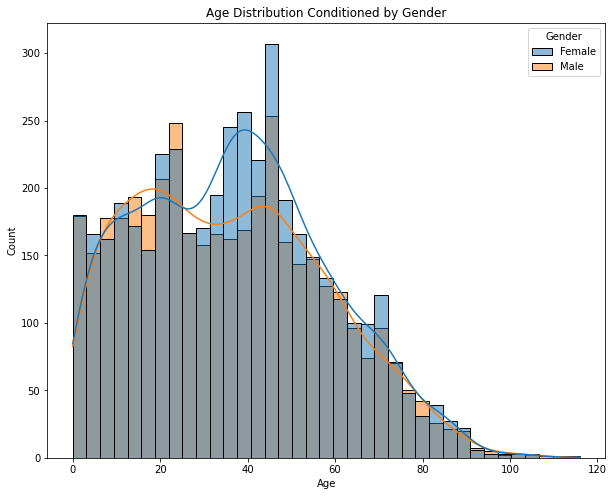

In [89]:
plt.figure(figsize=(10,8))
sns.histplot(data=census_df, x='Age',hue='Gender', kde=True)
plt.title('Age Distribution Conditioned by Gender')
plt.show()

## Population (Age) Pyramid:

Defining a function to group the ages in ranges e.g 0-4, 5-9, etc.:

In [90]:
def age_range_func(x,y):
    '''
    x,y: Used in specifying age interval.
    NOTE: x must start from 0. for age interval of 5 years, y equals 5.
    '''
    age_d = []
    while y<100:
        for age in range(x,100,y):
            if age < 100:
                range_ = str(age) +'-'+str(y-1)
                age_d.append(range_)
            x=y
            y=y+5
        age_d.append('100+')
    return age_d

Defining a function to generate list of total males and females for each age range:

In [91]:
def gender_age_count(data,gender,x=0,y=5):
    '''
    data: Dataframe being considered.
    gender: Specifies gender (male or female)
    x,y: Specifies age range 
    '''
    count_list = []
    sub = []
    while y<=120:
        df_gender = data.loc[(data['Gender']==gender) & (data['Age']>=x) & (data['Age']<y)]
        if y <= 100:
            count_age = len(df_gender['Age'])
            if gender == 'Male':
                count_list.append(-count_age)
            elif gender == 'Female':
                count_list.append(count_age)
        elif y > 100:
            count_age = len(df_gender['Age'])
            if gender == 'Male':
                sub.append(-count_age)
            elif gender == 'Female':
                sub.append(count_age)
        x=x+5
        y=y+5
    count_list.append(np.array(sub).sum())
    return count_list

Creating the dataframe for the age pyramid:

In [92]:
#List of age range with 5 years gap:
age_range = age_range_func(x=0,y=5)

#Total population count based on gender for each age group:
male_percent = gender_age_count(data=census_df, gender='Male', x=0, y=5)
female_percent = gender_age_count(data=census_df, gender='Female', x=0, y=5)

#Reversing the values to align with the age range list:
age_range.reverse()
male_percent.reverse()
female_percent.reverse()

#Creating a list to hold total population count:
total_pop = []
for a,b in zip(male_percent,female_percent):
    sum_ = -a + b
    total_pop.append(sum_)
    
#Creating the DataFrame for the age pyramid:
age_df = pd.DataFrame({'Ages':age_range,'Males':male_percent,'Females':female_percent, 'Population Count':total_pop})

In [93]:
age_df

,Ages,Males,Females,Population Count
0,100+,-8,9,17
1,95-99,-6,4,10
2,90-94,-10,10,20
3,85-89,-38,45,83
4,80-84,-54,61,115
5,75-79,-87,75,162
6,70-74,-111,147,258
7,65-69,-129,151,280
8,60-64,-196,193,389
9,55-59,-232,225,457


Plotting the Age Pyramid:

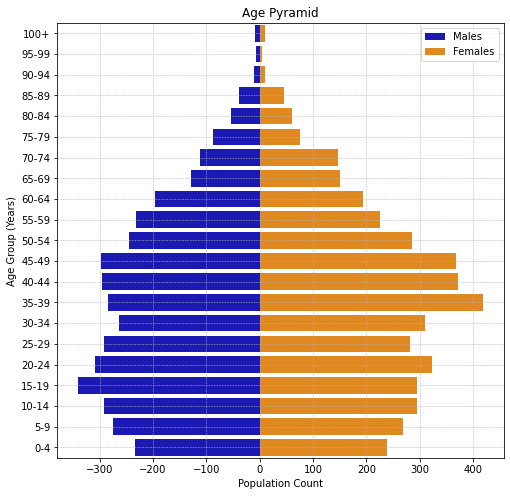

In [94]:
age_pyramid_func(data=age_df,plot_size=(8,8),y='Ages',order=age_range,plot_title='Age Pyramid',xlabel='Population Count',\
                ylabel='Age Group (Years)')

- Although the town had a relatively low birth rate (0-4), they tend to increase in size as they attain middle age. Both genders live relatively well into old age.

### Gender and Age:

In [95]:
census_df.groupby('Gender')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,4372.0,36.788884,21.539247,0.0,19.0,37.0,51.0,116.0
Male,4001.0,35.796301,22.036668,0.0,17.0,34.0,52.0,112.0


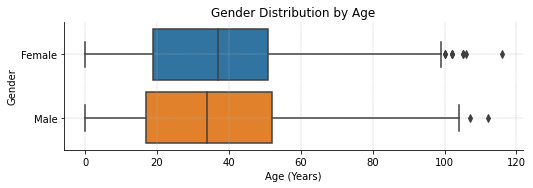

In [96]:
catplot_func(data=census_df,x='Age',y='Gender',kind='box',height=2.5,aspect=3,plot_title='Gender Distribution by Age',\
             xlabel='Age (Years)')

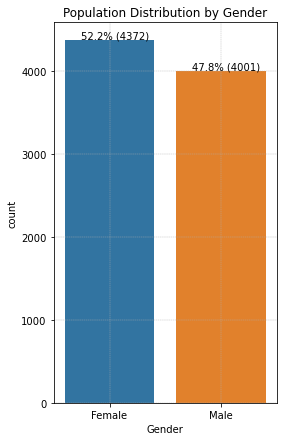

In [97]:
countplot_func(data=census_df,main_data=census_df,plot_size=(4,7),xlabel='Gender',\
                   plot_title='Population Distribution by Gender',plot_variable='Gender',add_count=True)

### Marital Status

In [98]:
census_df.groupby('Marital Status')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Marital Status,,,,,,,,
Divorced,790.0,42.449367,17.374919,18.0,29.0,39.0,52.0,100.0
Married,2221.0,50.488969,16.751617,18.0,38.0,48.0,62.0,116.0
N/A,1977.0,8.982296,5.072769,0.0,5.0,9.0,13.0,17.0
Single,2998.0,38.254837,14.173496,18.0,26.0,37.0,49.0,96.0
Widowed,387.0,67.041344,18.265127,18.0,65.5,71.0,78.0,105.0


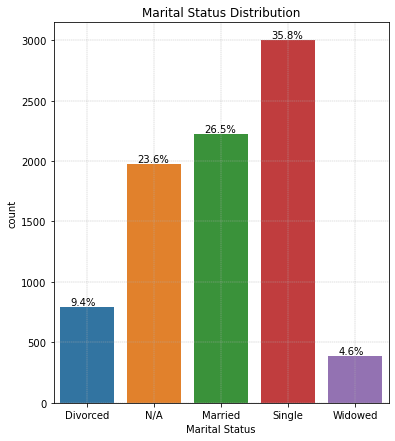

In [99]:
#Plotting the marital status:
countplot_func(data=census_df,main_data=census_df,plot_size=(6,7),xlabel='Marital Status',\
                   plot_title='Marital Status Distribution',plot_variable='Marital Status',add_count=False)

- As shown above, 35.8% of the entries are Single while 26.5% are Married.
- 9.4% of the data are Divorced while those who are Widowed, occupy just 4.6% of the data.

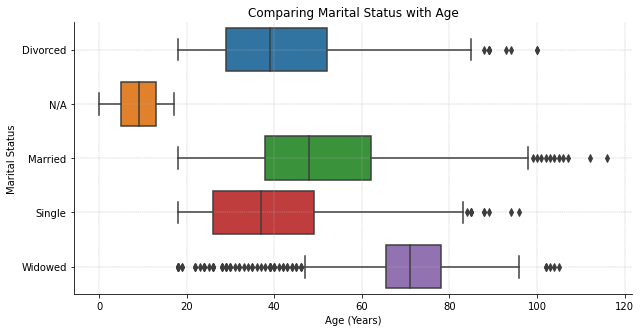

In [100]:
catplot_func(data=census_df,x='Age',y='Marital Status',kind='box',height=4.5,aspect=2,\
             plot_title='Comparing Marital Status with Age',xlabel='Age (Years)')

### Computing Marriage and Divorce Rate:

In [101]:
married_num = len(census_df[(census_df['Marital Status']=='Married') & (census_df['Gender']=='Female')])
divorced_num = len(census_df[(census_df['Marital Status']=='Divorced') & (census_df['Gender']=='Female')])
population_count = len(census_df)

In [102]:
crude_marriage_rate = (married_num / population_count) * 1000
crude_divorce_rate = (divorced_num / population_count) * 1000

print(f'Crude Marriage Rate is: {round(crude_marriage_rate,0)} marriages per Thousand.')
print('----------------------------------------')
print(f'Crude Divorce Rate is: {round(crude_divorce_rate,0)} divorces per Thousand.')

Crude Marriage Rate is: 133.0 marriages per Thousand.
----------------------------------------
Crude Divorce Rate is: 56.0 divorces per Thousand.


In [103]:
divorce_to_marriage = round((crude_divorce_rate / crude_marriage_rate),2) * 100
print(f'The divorce to marriage rate is: {divorce_to_marriage}%')

The divorce to marriage rate is: 42.0%


### Comparing Divorce and Marriage Rate and Age Based on Gender:

In [104]:
married_divorcedDf = census_df[census_df['Marital Status'].isin(['Married','Divorced'])]
married_divorcedDf.groupby(['Gender','Marital Status'])['Age'].describe()

count       mean        std   min   25%   50%   75%  \
Gender Marital Status                                                         
Female Divorced         473.0  43.640592  17.560483  18.0  31.0  40.0  53.0   
       Married         1117.0  49.436885  16.701759  18.0  37.0  48.0  60.0   
Male   Divorced         317.0  40.671924  16.966635  18.0  26.0  38.0  51.0   
       Married         1104.0  51.553442  16.742269  18.0  39.0  50.0  63.0   

                         max  
Gender Marital Status         
Female Divorced        100.0  
       Married         116.0  
Male   Divorced         84.0  
       Married         112.0

Plotting Divorced rate based on gender:

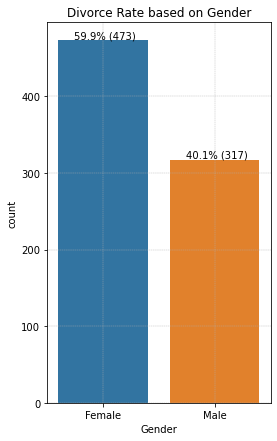

In [105]:
#Creating dataframe of all divorced entries:
divorced_df = census_df[census_df['Marital Status']=='Divorced']

countplot_func(data=divorced_df,main_data=divorced_df,plot_size=(4,7),xlabel='Gender',\
                   plot_title='Divorce Rate based on Gender',plot_variable='Marital Status',add_count=True)

- Female divorcees still living in the town are about 9.8% more than their male counterparts. It can be assumed that the some men do leave the town to settle elsewhere after they get a divorce.

### Infirmity:

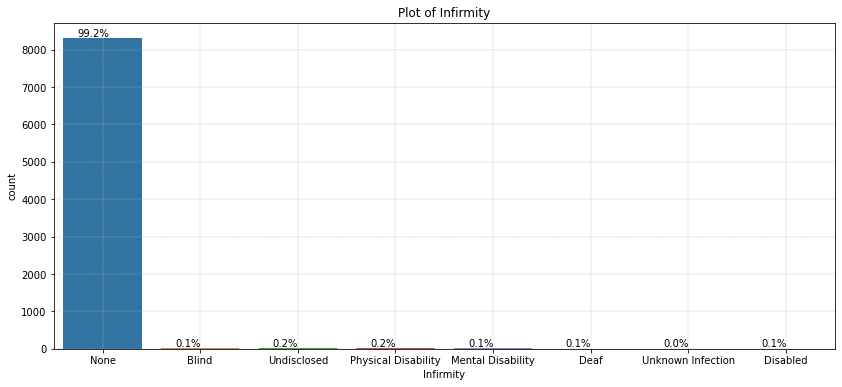

In [106]:
#Infirmity State across population:
countplot_func(data=census_df,main_data=census_df,plot_size=(14,6),xlabel='Infirmity',plot_title='Plot of Infirmity',\
                    plot_variable='Infirmity',add_count=False)

- 99.2% of the entries are had no form of infirmity.
- This indicates that a most people are in good health.

In [107]:
#Infirmity Status and Age distribution:
census_df.groupby('Infirmity')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Infirmity,,,,,,,,
Blind,9.0,40.555556,18.262743,13.0,37.00,39.0,44.00,75.0
Deaf,7.0,37.857143,19.869814,16.0,25.50,31.0,46.00,75.0
Disabled,8.0,30.125000,20.173798,8.0,13.75,27.5,40.50,61.0
Mental Disability,10.0,32.000000,22.784010,0.0,14.25,31.0,47.75,63.0
None,8304.0,36.309730,21.794905,0.0,19.00,36.0,51.00,116.0
Physical Disability,18.0,40.333333,19.580903,3.0,32.25,45.5,51.75,68.0
Undisclosed,13.0,36.153846,25.442242,5.0,16.00,28.0,47.00,89.0
Unknown Infection,4.0,39.750000,12.500000,26.0,33.50,38.5,44.75,56.0


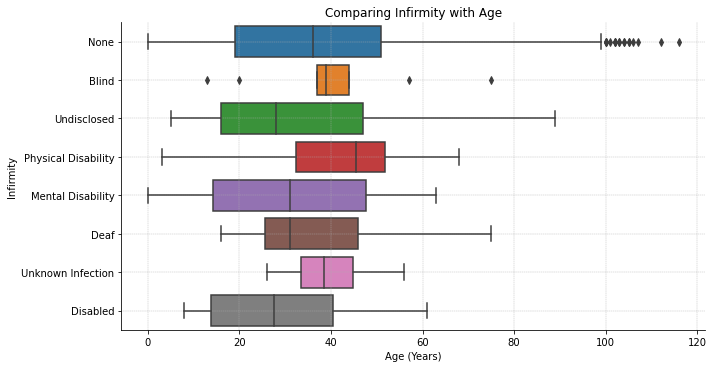

In [108]:
#Plotting Infirmity and Age:
catplot_func(data=census_df,x='Age',y='Infirmity',kind='box',height=5,aspect=2,plot_title='Comparing Infirmity with Age',\
             xlabel='Age (Years)')

- Although there are cases of infirmity across all ages, people above 85 years sufferred no infirmity which could mean that they are well taken care of at old age.

### Religion Plot

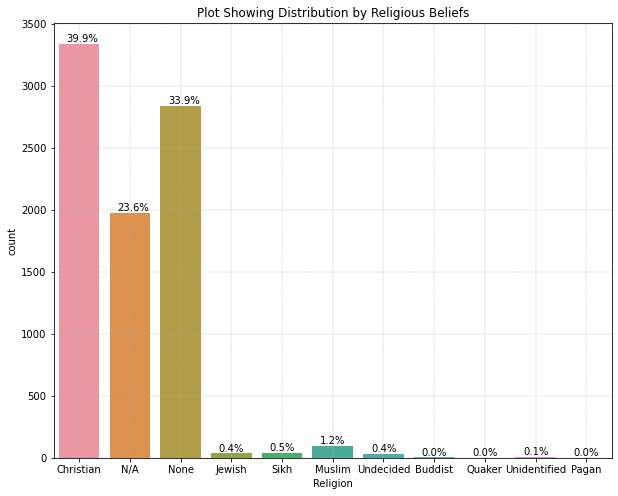

In [109]:
#Plotting the Religion:
countplot_func(data=census_df,main_data=census_df,plot_size=(10,8),xlabel='Religion',\
                    plot_title='Plot Showing Distribution by Religious Beliefs',plot_variable='Religion',add_count=False)

- Most of the entries (39.9%) belonged to none of the religions while 39.9% are Christians.

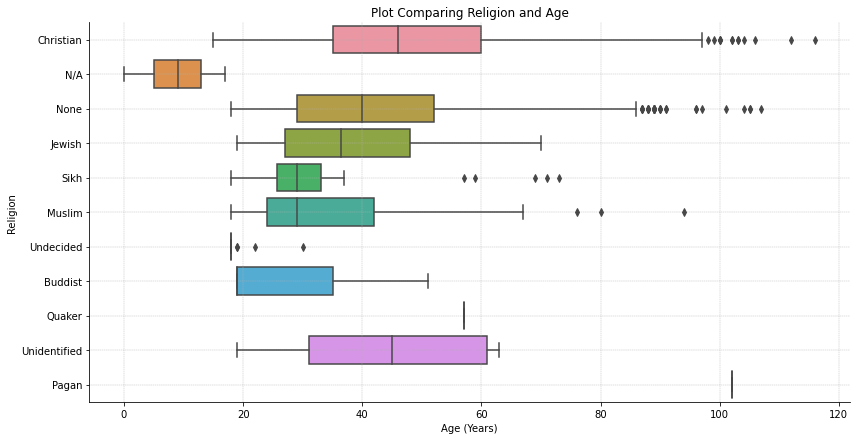

In [110]:
#Religious affiliations and age:
catplot_func(data=census_df,x='Age',y='Religion',kind='box',height=6,aspect=2,plot_title='Plot Comparing Religion and Age',\
             xlabel='Age (Years)')

- People above 100 years old are mainly associated with christian religion.

### Occupation Plot:

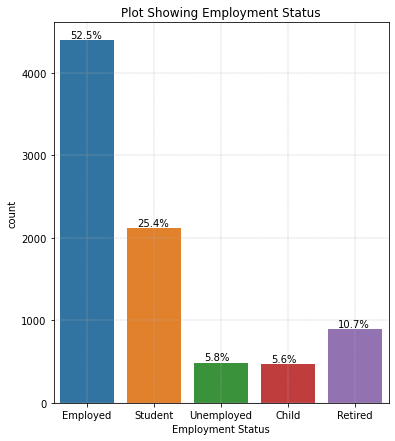

In [111]:
#Plotting Employment Status:
countplot_func(data=census_df,main_data=census_df,plot_size=(6,7),xlabel='Employment Status',\
                    plot_title='Plot Showing Employment Status',plot_variable='Occupation',add_count=False)

- over 50% of the entries are employed

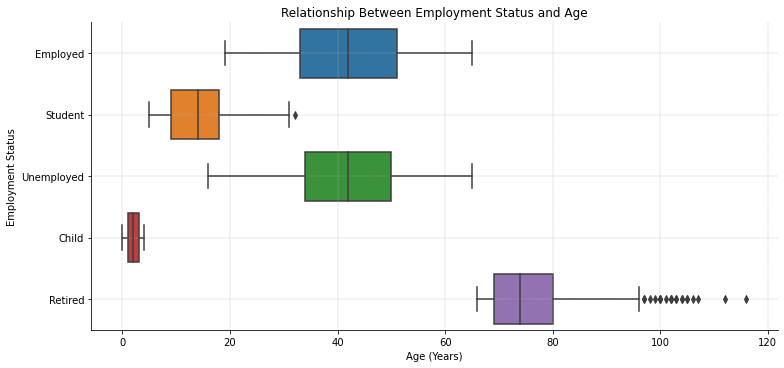

In [112]:
#Employment Status distribution and Age:
catplot_func(data=census_df,x='Age',y='Employment Status',kind='box',height=5,aspect=2.2,\
             plot_title='Relationship Between Employment Status and Age',xlabel='Age (Years)')

In [113]:
#Employment Status and age distribution:
census_df.groupby('Employment Status')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Employment Status,,,,,,,,
Child,473.0,2.114165,1.439335,0.0,1.0,2.0,3.0,4.0
Employed,4392.0,42.168488,11.692672,19.0,33.0,42.0,51.0,65.0
Retired,897.0,75.687848,8.141508,66.0,69.0,74.0,80.0,116.0
Student,2123.0,13.769195,5.223511,5.0,9.0,14.0,18.0,32.0
Unemployed,488.0,42.487705,11.260763,16.0,34.0,42.0,50.0,65.0


- 50% of the those curremtly employed (4392) and unemployed (488) are between 42 and 65 years old, with 25% above 50 years old. This indicates that in years to come, these people will reach retirement age, hence the need to invest in a good retirement plan to cater for them.

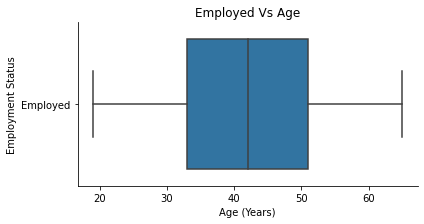

In [114]:
#Comparing Employed Status and Age:
employed_status = census_df[census_df['Employment Status']=='Employed']
sns.catplot(data=employed_status, x='Age', y='Employment Status',height=3,kind='box',aspect=2)
plt.title('Employed Vs Age')
plt.xlabel('Age (Years)')
plt.show()

### Computing Total number of Commuters:
It has been stated that students at the university are commuters, since there are no universities in the town. Similarly, university or higher education workers (Lecturers, Higher Education Career Advisers, etc.) would likely commute since no university is within the town.

In [115]:
#Creating a copy of original data for reference:
copy_censusDf = census_df.copy()

In [116]:
#Total number of university workers:
university_workers = len(census_df[(census_df['Occupation'].str.contains('lecturer|Lecturer|Higher education|higher education'))])
print(f'Total workers in the university is: {university_workers}')

Total workers in the university is: 38


In [117]:
total_commuters = len(census_df[census_df['Occupation'].str.contains('University Student|PhD Student')]) + university_workers
print(f'Total number of commuters is: {total_commuters}')

Total number of commuters is: 579


### Student Distribution:

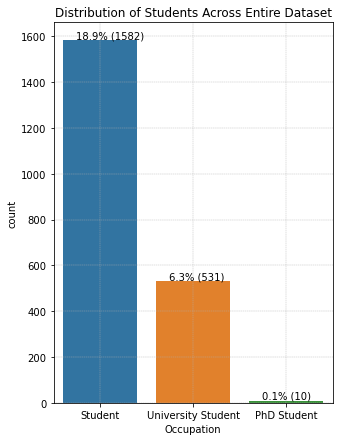

In [118]:
#Extracting entries whose Occupation are students:
studentDf = census_df[census_df['Occupation'].str.contains('Student')]

#Plot showing Occupation distribution for the students:
countplot_func(data=studentDf,main_data=census_df,plot_size=(5,7),xlabel='Occupation',\
                    plot_title='Distribution of Students Across Entire Dataset',plot_variable='Occupation',add_count=True)

- 18.9% (i.e 1,582) of all entries in the data are regular high school or non-tertiary students.
- 6.3% (531) of entries are University students while only 0.1% (10) are enrolled for their Ph.D.

This points to the fact that about 531 of the total number of the students are university student who need to commute to their university on a regular basis. Also, more students will be attending the university in the nearest future, as seen from the 1582 students in non tertiary institutions. So building a train station to accomodate these large number of students leaving the town to attend university will be important.

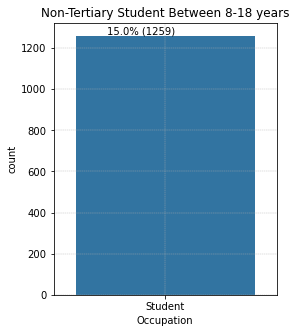

In [119]:
#Extracting entries who are non university students between 8 and 18:
non_university_stud = census_copyDf[(census_copyDf['Occupation']=='Student')]
student_future = non_university_stud[non_university_stud['Age'].isin(range(8,19))]

#Plot showing fraction of non university students between 8 and 18:
countplot_func(data=student_future,main_data=census_df,plot_size=(4,5),xlabel='Occupation',\
                    plot_title='Non-Tertiary Student Between 8-18 years',plot_variable='Occupation',add_count=True)

- 15% of the population will be of university age (18 years) in 10 years time.

In [120]:
#Grouping all students with their Age:
student_df = census_copyDf[(census_copyDf['Occupation'].str.contains('Student'))]
student_df.groupby('Occupation')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Occupation,,,,,,,,
PhD Student,10.0,27.400000,2.988868,24.0,24.5,27.0,29.75,32.0
Student,1582.0,11.481669,3.900321,5.0,8.0,11.0,15.00,18.0
University Student,531.0,20.327684,1.221647,18.0,19.0,20.0,21.00,22.0


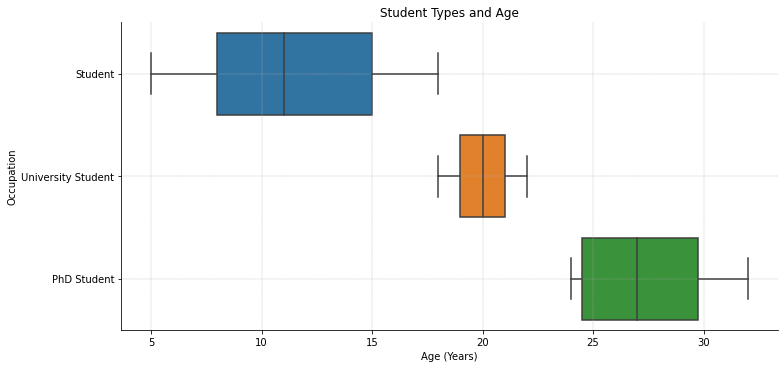

In [121]:
#Plot of students with age:
catplot_func(data=student_df,x='Age',y='Occupation',kind='box',height=5,aspect=2.2,\
             plot_title='Student Types and Age',xlabel='Age (Years)')

- Students above 25 years are PhD. Students.

### Birth and Death Rate:
Since, we have no previous population records, it was assummed that there were no migration or emigration in and out of the town. So entries with 0 years are new borns within the year.

For the death rate, features named Population Count and Cummulative Count were added to aid analysis.
- Population Count: The tolal population at each age range.
- Cummulative Count: Cummulative difference between the population count (for checking population growth or decline).

##### Crude Birth Rate:

In [122]:
birth_number = len(census_df[census_df['Age']==0])
total_population = len(census_df)

In [123]:
crude_birth_rate = (birth_number/total_population) * 1000
print(f'The Crude Birth Rate is: {round(crude_birth_rate,0)} per Thousand')

The Crude Birth Rate is: 11.0 per Thousand


Estimating the birth rate 5 years ago:

In [124]:
birth_number_5 = len(census_df[census_df['Age']==5])
crude_birth_rate_5 = (birth_number_5/total_population) * 1000
print(f'The Crude Birth Rate is: {round(crude_birth_rate_5,0)} per Thousand')

The Crude Birth Rate is: 13.0 per Thousand


In [125]:
#Computing percent difference between the crude birth rates:
percent_diff = ((crude_birth_rate_5 - crude_birth_rate)/crude_birth_rate) * 100
print(f'The Crude Birth Rate 5 years ago was {round(percent_diff,1)}% higher than now.')

The Crude Birth Rate 5 years ago was 18.0% higher than now.


- The birth rate 5 years ago is 18% higher than the current birth rate indicating a lower birth rate as seen from the age pyramid.

### Justification for Low birth rate now compared to 5 years ago:

In [126]:
#Creating an instance of the fertility age range:
fertility_age_range = range(15,46)


#Current popularion fertility_age_range (15 - 45):
fertility_age_now = census_df[(census_df['Age'].isin(range(15,46))) & (census_df['Gender']=='Female')]['Age']

#Female fertility_age_ramge 5 years ago:
fertility_age_past = []
for ages in census_df[census_df['Gender']=='Female']['Age']:
    past_ages = ages - 5
    if past_ages in fertility_age_range:
        fertility_age_past.append(past_ages)
    else:
        continue
print(f'Total number Females within fertility age (15 and 45) presently is: {len(fertility_age_now)}')
print('----------------------------------------------------------------------------------')
print(f'Total number Females within fertility age (15 and 45) 5 years ago is: {len(fertility_age_past)}')

Total number Females within fertility age (15 and 45) presently is: 2071
----------------------------------------------------------------------------------
Total number Females within fertility age (15 and 45) 5 years ago is: 2132


In [127]:
#Percent reduction in current number of females compared to 5 years ago:
percent_change = ((len(fertility_age_past) - len(fertility_age_now)) / len(fertility_age_past)) * 100
print(f'The current number of females within fertility age range reduced by {round(percent_change,1)}% compared to 5 years ago.')

The current number of females within fertility age range reduced by 2.9% compared to 5 years ago.


- This reduction explains justifies the low birth rate experienced currently in the population and also indicated by the smaller base (ages 0-4 years) on the age pyramid plotted above.

In [128]:
compare_fertility_df = pd.DataFrame({'Fertility Year':['Current','5 Years Ago'], 'Total number':[len(fertility_age_now), len(fertility_age_past)]})

In [129]:
compare_fertility_df

,Fertility Year,Total number
0,Current,2071
1,5 Years Ago,2132


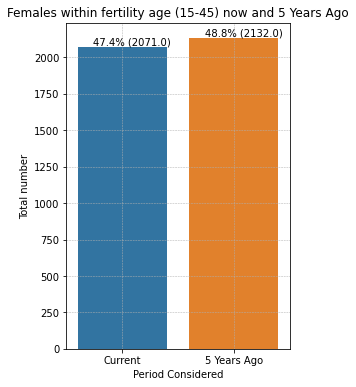

In [130]:
barplot_func(data=compare_fertility_df,plot_size=(4,6),main_data=census_df[census_df['Gender']=='Female'],\
             x='Fertility Year',y='Total number',xlabel='Period Considered',\
            plot_title='Females within fertility age (15-45) now and 5 Years Ago',plot_variable='Age',add_count=True)

- 5 years ago, about 49% of the female population were within fertility age range (15-45 years) which is slightly higher than what it is now (about 47%). 

##### Crude Death rate:

In [131]:
#Creating new Features, Population Count and cummulative Count:
#Population Count: Total population by age interval.
#Cummulative Count: cummulative population count
total = []
for index, row in age_df.iterrows():
    total_pop = (row['Males']* -1) + row['Females']
    total.append(total_pop)
new_ageDf = age_df[['Ages']]
new_ageDf['Population Count'] = total

new_diff = []
i = 0
while i in range(0,21):
    if i==len(total)-1:
        difference = 0
        new_diff.append(difference)
    else:
        difference = total[i] - total[i+1]
        new_diff.append(difference)
    i+=1
new_ageDf['Cummulative Count'] = new_diff

C:\Users\ohiom\AppData\Local\Temp/ipykernel_30408/554501956.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_ageDf['Population Count'] = total
C:\Users\ohiom\AppData\Local\Temp/ipykernel_30408/554501956.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_ageDf['Cummulative Count'] = new_diff


In [132]:
new_ageDf

,Ages,Population Count,Cummulative Count
0,100+,17,7
1,95-99,10,-10
2,90-94,20,-63
3,85-89,83,-32
4,80-84,115,-47
5,75-79,162,-96
6,70-74,258,-22
7,65-69,280,-109
8,60-64,389,-68
9,55-59,457,-73


- Total Count holds the sum of population count of both genders while Total Decline represents the cummulative difference between the Total Count (negative indicates reduction while positive indicates increase in population).

Calculating Crude Death Rate:

In [133]:
total_decline = -(new_ageDf.loc[range(1,8)]['Cummulative Count'].values).sum()
total_population_65 = len(census_df['Age']>=65)
average_decline = total_decline/len(new_ageDf.loc[range(1,8)])
crude_death_rate = (average_decline/total_population_65) * 1000
print(f'The Crude Death Rate is: {round(crude_death_rate,1)} deaths per thousand.')

The Crude Death Rate is: 6.5 deaths per thousand.


### Employment and Unemployment Trend:

In [134]:
employment_statusDf = census_df[(census_df['Employment Status'].isin(['Employed','Unemployed'])) & (census_df['Age'].isin(range(16,66)))]

In [135]:
employ_status_age = employment_statusDf[['Employment Status', 'Age']]

In [136]:
employ_status_age

,Employment Status,Age
0,Employed,41
3,Employed,40
4,Employed,35
8,Employed,60
9,Employed,62
...,...,...
8362,Employed,23
8369,Employed,44
8370,Employed,32
8371,Employed,52


In [137]:
employment_statusDf.groupby('Employment Status')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Employment Status,,,,,,,,
Employed,4392.0,42.168488,11.692672,19.0,33.0,42.0,51.0,65.0
Unemployed,488.0,42.487705,11.260763,16.0,34.0,42.0,50.0,65.0


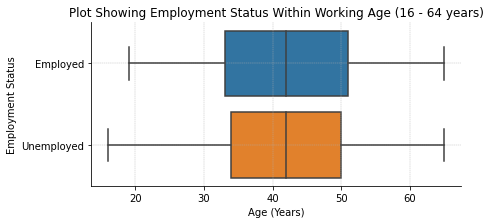

In [138]:
catplot_func(data=employment_statusDf,x='Age',y='Employment Status',kind='box',height=3,aspect=2.2,\
             plot_title='Plot Showing Employment Status Within Working Age (16 - 64 years)',xlabel='Age (Years)')

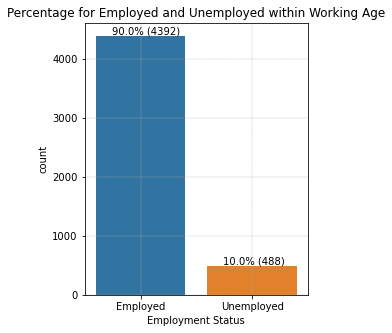

In [139]:
#Plot showing all employment status within working age: 
countplot_func(data=employment_statusDf,main_data=employment_statusDf,plot_size=(4,5),xlabel='Employment Status',\
                    plot_title='Percentage for Employed and Unemployed within Working Age',plot_variable='Employment Status',add_count=True)

### Future Retirement

##### Computing percentage of retirement in 15 years time:
Note: Ages 50 years and above would be of retirement age in 15 years time.

In [140]:
future_retire = age_df[age_df['Ages'].isin(['50-54','55-59','60-64'])]

In [141]:
future_retire

,Ages,Males,Females,Population Count
8,60-64,-196,193,389
9,55-59,-232,225,457
10,50-54,-245,285,530


In [142]:
retire_above_50 = (future_retire['Population Count'].sum()/\
                   len(employment_statusDf[employment_statusDf['Employment Status']=='Employed']))*100
print(f'{round(retire_above_50, 1)}% of those employed would already be retired in 15 years')

31.3% of those employed would already be retired in 15 years


Barplot to show the percentage of those employed whose retirement is at least 15 years from now:

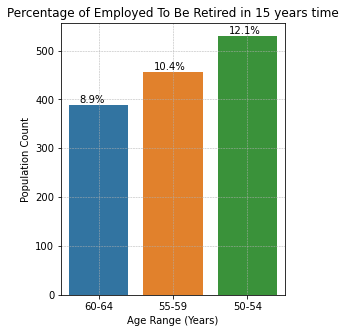

In [143]:
barplot_func(data=future_retire,plot_size=(4,5),main_data=employment_statusDf[employment_statusDf['Employment Status']=='Employed'],\
             x='Ages',y='Population Count',xlabel='Age Range (Years)',\
            plot_title='Percentage of Employed To Be Retired in 15 years time',plot_variable='Age',add_count=False)

- A total of about 31.4% of those currently working will be retired in 15 years time.

## Migration:

#### Immigration:

In [144]:
#Extracting lodger information:
lodgers_df = census_df[census_df['Relationship to Head of House']=='Lodger']
lodgers_df.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Employment Status
52,6,Telegraphnet Street,Mark,Webb,25,Lodger,Widowed,Male,Set designer,None,None,Employed
310,140,Smith Port,Tony,Short,59,Lodger,Single,Male,Holiday representative,None,None,Employed
311,140,Smith Port,Clare,Jones,61,Lodger,Widowed,Female,"Scientist, physiological",None,None,Employed
316,144,Smith Port,Julian,Morgan,27,Lodger,Single,Male,Forensic psychologist,None,Sikh,Employed
383,5,Trent Crescent,Elaine,Dean,50,Lodger,Single,Female,"Surveyor, hydrographic",None,None,Employed


In [145]:
#Number of lodgers:
num_of_immigrants = len(lodgers_df)
num_of_immigrants

281

In [146]:
lodgers_df.groupby(['Employment Status'])['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Employment Status,,,,,,,,
Employed,242.0,41.789256,12.504979,19.0,30.0,41.0,52.00,64.0
Student,27.0,20.666667,1.270978,18.0,20.0,21.0,22.00,22.0
Unemployed,12.0,39.166667,12.597499,24.0,29.5,37.0,46.25,63.0


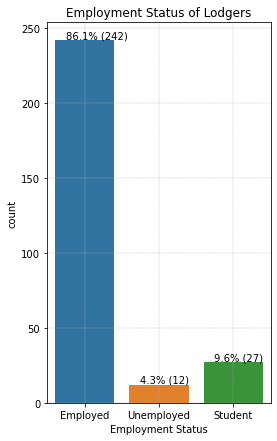

In [147]:
#Employment Status of Lodgers:
countplot_func(data=lodgers_df,main_data=lodgers_df,plot_size=(4,7),xlabel='Employment Status',\
                   plot_title='Employment Status of Lodgers',plot_variable='Employment Status',add_count=True)

- 86% of lodgers are Employed and most of these employed lodgers (50%) are between 30 and 52 years old.

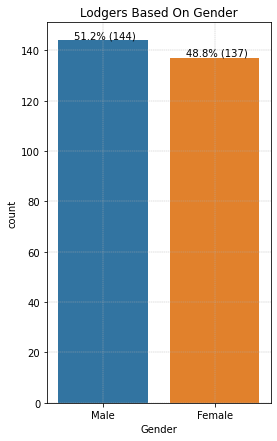

In [148]:
#Plot showing lodgers based on gender:
countplot_func(data=lodgers_df,main_data=lodgers_df,plot_size=(4,7),xlabel='Gender',\
                   plot_title='Lodgers Based On Gender',plot_variable='Gender',add_count=True)

- More males immigrating into town.

In [149]:
immigration_rate = (num_of_immigrants/len(census_df)) * 1000
print(f'The current immigration rate in the town is: {round(immigration_rate,0)} immigrants per thousand.')

The current immigration rate in the town is: 34.0 immigrants per thousand.


### Emmigration:

In [150]:
male_divorcee = divorced_df[divorced_df['Gender']=='Male']
female_divorcee = divorced_df[divorced_df['Gender']=='Female']

In [151]:
num_emmigrant = len(female_divorcee) - len(male_divorcee)
num_emmigrant

156

In [152]:
emmigration_rate = (num_emmigrant/len(census_df)) * 1000
print(f'The emmigration rate is currently at: {round(emmigration_rate,0)} immigrants per thousand.')

The emmigration rate is currently at: 19.0 immigrants per thousand.


## Net Migration Rate:

In [153]:
net_migration = ((num_of_immigrants - num_emmigrant)/len(census_df)) * 1000
print(f'The Net Migration rate for the town is: {round(net_migration,0)} migrants per thousand.')

The Net Migration rate for the town is: 15.0 migrants per thousand.


- The population is slightly increasing despite the low birth rate as shown from the age pyramid.
- immigration rate is higher than the emmigration rate meaning more people enter the town than they leave. Also, from the employed lodgers, 50% are between 30 and 52 years old which is slightly equals the age range of those in employment, justifying influx of people.